In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

2025-01-20 04:25:21.142676: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 04:25:21.185034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-20 04:25:21.185067: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-20 04:25:21.185126: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 04:25:21.201285: I tensorflow/core/platform/cpu_feature_g

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_val = X_train_full[:5000]
y_val = y_train_full[:5000]

In [ ]:
import os

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
!tensorboard --logdir=./my_cifar10_logs --port=6006

2025-01-18 13:07:51.947648: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-18 13:07:51.972173: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-18 13:07:51.972238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-18 13:07:51.972259: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 13:07:51.977460: I tensorflow/core/platform/cpu_feature_g

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 1.2157 - accuracy: 0.5633 - val_loss: 1.4817 - val_accuracy: 0.4876
Epoch 2/100
176/176 [==============================] - 6s 32ms/step - loss: 1.1926 - accuracy: 0.5717 - val_loss: 1.4855 - val_accuracy: 0.4816
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1841 - accuracy: 0.5758 - val_loss: 1.4927 - val_accuracy: 0.4826
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1780 - accuracy: 0.5785 - val_loss: 1.4904 - val_accuracy: 0.4884
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1725 - accuracy: 0.5813 - val_loss: 1.5009 - val_accuracy: 0.4790
Epoch 6/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1688 - accuracy: 0.5828 - val_loss: 1.5035 - val_accuracy: 0.4820
Epoch 7/100
176/176 [==============================] - 3s 15ms/step - loss: 1.1647 - accuracy: 0.5832 - val_loss: 1.5082 - val_accuracy:

In [ ]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 4ms/step - loss: 1.4817 - accuracy: 0.4876


[1.4816808700561523, 0.4875999987125397]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))

model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100, batch_size=256,
          validation_data=(X_val, y_val),
          callbacks=callbacks)

Epoch 1/100
176/176 [==============================] - 17s 37ms/step - loss: 1.8190 - accuracy: 0.3519 - val_loss: 2.0792 - val_accuracy: 0.3306
Epoch 2/100


/home/arth/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


176/176 [==============================] - 6s 36ms/step - loss: 1.5428 - accuracy: 0.4532 - val_loss: 1.9078 - val_accuracy: 0.3384
Epoch 3/100
176/176 [==============================] - 9s 54ms/step - loss: 1.4401 - accuracy: 0.4858 - val_loss: 1.7643 - val_accuracy: 0.3966
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 1.3732 - accuracy: 0.5111 - val_loss: 1.6369 - val_accuracy: 0.4288
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 1.3139 - accuracy: 0.5316 - val_loss: 1.6933 - val_accuracy: 0.4138
Epoch 6/100
176/176 [==============================] - 6s 36ms/step - loss: 1.2652 - accuracy: 0.5511 - val_loss: 1.9175 - val_accuracy: 0.3496
Epoch 7/100
176/176 [==============================] - 6s 36ms/step - loss: 1.2202 - accuracy: 0.5680 - val_loss: 1.6726 - val_accuracy: 0.4298
Epoch 8/100
176/176 [==============================] - 9s 53ms/step - loss: 1.1785 - accuracy: 0.5812 - val_loss: 1.6312 - val_accuracy: 0.4606
Epoc

In [ ]:
model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 6ms/step - loss: 1.5228 - accuracy: 0.4810


[1.522750735282898, 0.48100000619888306]

In [ ]:
import os

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_val - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_val), batch_size=128,
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_val)

Epoch 1/100


2025-01-18 14:45:07.749008: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1edb0475b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-18 14:45:07.749055: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-01-18 14:45:07.766643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-18 14:45:07.797197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2025-01-18 14:45:07.982200: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


352/352 [==============================] - 15s 19ms/step - loss: 1.8501 - accuracy: 0.3403 - val_loss: 1.7067 - val_accuracy: 0.3890
Epoch 2/100


/home/arth/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - 9s 27ms/step - loss: 1.6456 - accuracy: 0.4190 - val_loss: 1.6135 - val_accuracy: 0.4238
Epoch 3/100
352/352 [==============================] - 6s 18ms/step - loss: 1.5359 - accuracy: 0.4549 - val_loss: 1.5694 - val_accuracy: 0.4496
Epoch 4/100
352/352 [==============================] - 6s 18ms/step - loss: 1.4637 - accuracy: 0.4835 - val_loss: 1.5171 - val_accuracy: 0.4594
Epoch 5/100
352/352 [==============================] - 7s 19ms/step - loss: 1.3958 - accuracy: 0.5103 - val_loss: 1.4723 - val_accuracy: 0.4824
Epoch 6/100
352/352 [==============================] - 7s 19ms/step - loss: 1.3439 - accuracy: 0.5270 - val_loss: 1.4614 - val_accuracy: 0.4782
Epoch 7/100
352/352 [==============================] - 9s 27ms/step - loss: 1.2984 - accuracy: 0.5414 - val_loss: 1.4560 - val_accuracy: 0.4906
Epoch 8/100
352/352 [==============================] - 6s 18ms/step - loss: 1.2521 - accuracy: 0.5612 - val_loss: 1.4514 - val_accuracy: 0.4932
Epoc

[1.4317923784255981, 0.5117999911308289]

In [ ]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_val)

157/157 [==============================] - 1s 7ms/step - loss: 1.4318 - accuracy: 0.5118


[1.4317923784255981, 0.5117999911308289]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_val - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_val), batch_size=256,
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_val)

Epoch 1/100


2025-01-18 15:55:11.056077: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1fb51ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-18 15:55:11.056244: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-01-18 15:55:11.076503: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-18 15:55:11.112760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2025-01-18 15:55:11.240526: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 [==============================] - 16s 40ms/step - loss: 1.9404 - accuracy: 0.3192 - val_loss: 1.6585 - val_accuracy: 0.4070
Epoch 2/100


/home/arth/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


176/176 [==============================] - 4s 21ms/step - loss: 1.6289 - accuracy: 0.4199 - val_loss: 1.5836 - val_accuracy: 0.4444
Epoch 3/100
176/176 [==============================] - 4s 21ms/step - loss: 1.5090 - accuracy: 0.4634 - val_loss: 1.5299 - val_accuracy: 0.4600
Epoch 4/100
176/176 [==============================] - 4s 20ms/step - loss: 1.4290 - accuracy: 0.4934 - val_loss: 1.5071 - val_accuracy: 0.4768
Epoch 5/100
176/176 [==============================] - 3s 20ms/step - loss: 1.3661 - accuracy: 0.5168 - val_loss: 1.4664 - val_accuracy: 0.4904
Epoch 6/100
176/176 [==============================] - 4s 21ms/step - loss: 1.3056 - accuracy: 0.5406 - val_loss: 1.4569 - val_accuracy: 0.4952
Epoch 7/100
176/176 [==============================] - 3s 19ms/step - loss: 1.2622 - accuracy: 0.5534 - val_loss: 1.4882 - val_accuracy: 0.4974
Epoch 8/100
176/176 [==============================] - 3s 18ms/step - loss: 1.2121 - accuracy: 0.5696 - val_loss: 1.4761 - val_accuracy: 0.5074
Epoc

[1.4569337368011475, 0.4952000081539154]

In [ ]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy

157/157 [==============================] - 0s 2ms/step


0.4954

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

176/176 [==============================] - 7s 29ms/step - loss: nan - accuracy: 0.1353


(9.999999747378752e-06,
 9.245111465454102,
 2.688497543334961,
 4.066368852342879)

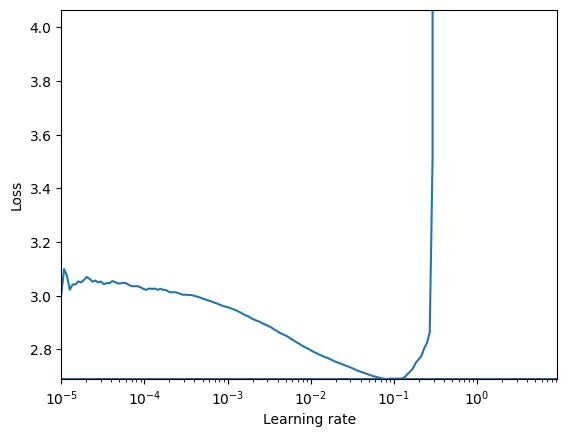

In [ ]:
import math

batch_size = 256
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [ ]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_val),
                    callbacks=[onecycle])

Epoch 1/15
176/176 [==============================] - 4s 14ms/step - loss: 2.1477 - accuracy: 0.2641 - val_loss: 1.7996 - val_accuracy: 0.3630
Epoch 2/15
176/176 [==============================] - 2s 12ms/step - loss: 1.8517 - accuracy: 0.3544 - val_loss: 1.7234 - val_accuracy: 0.3940
Epoch 3/15
176/176 [==============================] - 2s 12ms/step - loss: 1.7135 - accuracy: 0.3931 - val_loss: 1.6776 - val_accuracy: 0.4148
Epoch 4/15
176/176 [==============================] - 2s 12ms/step - loss: 1.6186 - accuracy: 0.4250 - val_loss: 1.6426 - val_accuracy: 0.4246
Epoch 5/15
176/176 [==============================] - 2s 12ms/step - loss: 1.5517 - accuracy: 0.4479 - val_loss: 1.5981 - val_accuracy: 0.4382
Epoch 6/15
176/176 [==============================] - 2s 12ms/step - loss: 1.5034 - accuracy: 0.4692 - val_loss: 1.5755 - val_accuracy: 0.4444
Epoch 7/15
176/176 [==============================] - 2s 12ms/step - loss: 1.4641 - accuracy: 0.4818 - val_loss: 1.5797 - val_accuracy: 0.4528

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class LayerNormalization(layers.Layer):
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
    def build(self, input_shape):
        self.alpha = self.add_weight(
            shape=input_shape[-1:],
            name="alpha",
            initializer="ones",
            dtype="float32",
        )
        self.beta = self.add_weight(
            shape=input_shape[-1:],
            name="beta",
            initializer="zeros",
            dtype="float32",
        )
        super().build(input_shape)

    def call(self, X):
      mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
      return self.alpha * (X - mean) / (tf.sqrt(variance + self.eps)) + self.beta

    def compute_output_shape(self, batch_input_shape):
      return batch_input_shape

    def get_config(self):
      base_config = super().get_config()
      return {**base_config, "eps": self.eps}

In [ ]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

2025-01-20 04:25:58.910096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


<tf.Tensor: shape=(), dtype=float32, numpy=4.7449034e-06>

In [ ]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=3.2543217e-06>